In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
travel = pd.read_csv('travel.csv')

In [200]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_id        118 non-null    int64  
 1   flight_no        118 non-null    object 
 2   departure_city   118 non-null    object 
 3   arrival_city     118 non-null    object 
 4   aircraft         118 non-null    object 
 5   fly_date         118 non-null    object 
 6   fly_date_dow     118 non-null    float64
 7   trevel_time_min  118 non-null    float64
 8   economy_seats    118 non-null    int64  
 9   taked_economy    118 non-null    int64  
 10  amount_economy   118 non-null    float64
 11  business_seats   118 non-null    int64  
 12  taked_business   118 non-null    int64  
 13  amount_business  118 non-null    float64
 14  all_seats        118 non-null    int64  
 15  all_taked        118 non-null    int64  
 16  all_amount       118 non-null    float64
dtypes: float64(5), i

In [201]:
#2600 кг/час - часовой расход Boeing 737-300
fuel_consumption_Boeing_per_min = 2600/60

In [202]:
#1700 кг/час - часовой расход Sukhoi Superjet-100
fuel_consumption_sukhoi_per_min = 1700/60

In [203]:
# 41435 - цена за 1000 кг топлива
cost_fuel_per_kg = 41435/1000

In [204]:
def fly_cost(row):
    if row['aircraft'] == 'Boeing 737-300':
        return int(row['trevel_time_min'] * fuel_consumption_Boeing_per_min * cost_fuel_per_kg)
    elif row['aircraft'] == 'Sukhoi Superjet-100':
        return int(row['trevel_time_min'] * fuel_consumption_sukhoi_per_min * cost_fuel_per_kg)
    
travel['fly_cost'] = travel.apply(fly_cost, axis = 1)

In [205]:
travel['profitability'] = travel['all_amount'] - travel['fly_cost']

In [206]:
travel['economy_filling'] = travel['taked_economy'] / travel['economy_seats']
travel['economy_filling'] = travel['economy_filling'].apply(lambda x: round(x,2))

travel['business_filling'] = travel['taked_business'] / travel['business_seats']
travel['business_filling'] = travel['business_filling'].apply(lambda x: round(x,2))

travel['all_filling'] = travel['all_taked'] / travel['all_seats']
travel['all_filling'] = travel['all_filling'].apply(lambda x: round(x,2))

In [207]:
dow = {1: 'Понедельник',
      2: 'Вторник',
      3: 'Среда',
      4: 'Четверг',
      5: 'Пятница',
      6: 'Суббота',
      7: 'Воскресенье'}

travel['fly_date_dow'] = travel['fly_date_dow'].apply(lambda x: dow[int(x)]) 

In [208]:
travel.sample(5)

,flight_id,flight_no,departure_city,arrival_city,aircraft,fly_date,fly_date_dow,trevel_time_min,economy_seats,taked_economy,...,taked_business,amount_business,all_seats,all_taked,all_amount,fly_cost,profitability,economy_filling,business_filling,all_filling
18,136215,PG0252,Anapa,Moscow,Boeing 737-300,2017-02-28T10:05:00Z,Вторник,100.0,118,103,...,11,402600.0,130,114,1664000.0,179551,1484449.0,0.87,0.92,0.88
57,136485,PG0252,Anapa,Moscow,Boeing 737-300,2017-01-27T10:05:00Z,Пятница,100.0,118,97,...,9,329400.0,130,106,1520000.0,179551,1340449.0,0.82,0.75,0.82
36,136348,PG0252,Anapa,Moscow,Boeing 737-300,2017-02-10T10:05:00Z,Пятница,100.0,118,108,...,12,439200.0,130,120,1762800.0,179551,1583249.0,0.92,1.00,0.92
69,136645,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-05T09:25:00Z,Четверг,51.0,85,73,...,9,170100.0,97,82,633000.0,59873,573127.0,0.86,0.75,0.85
47,136428,PG0252,Anapa,Moscow,Boeing 737-300,2017-01-21T10:05:00Z,Суббота,99.0,118,104,...,11,402600.0,130,115,1678600.0,177756,1500844.0,0.88,0.92,0.88


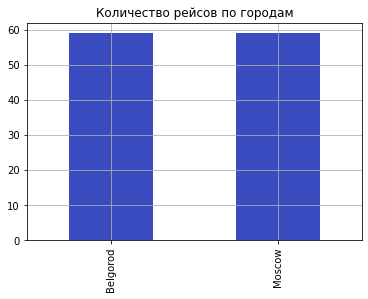

In [209]:
#1. график распределения по городам 
travel['arrival_city'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество рейсов по городам')

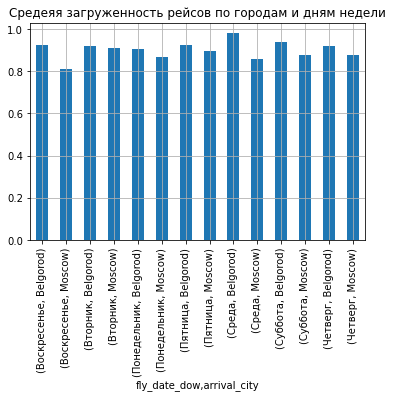

In [210]:
#2. график нагруженности по дням недели для двух направлений
travel.groupby(by = ['fly_date_dow', 'arrival_city'])['all_filling'].mean().plot(kind = 'bar', 
                                                                             grid= True,
                                                                             title = 'Средеяя загруженность рейсов по городам и дням недели')

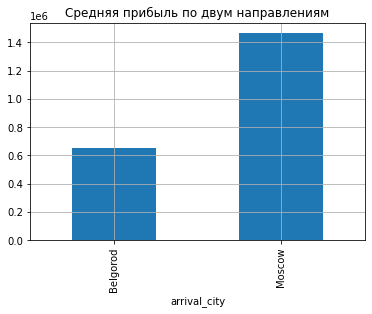

In [220]:
#3. график прибыли для двух направлений
travel.groupby(by = ['arrival_city'])['profitability'].mean().plot(kind = 'bar', 
                                                                   grid= True,
                                                                   title = 'Средняя прибыль по двум направлениям')

In [221]:
travel.groupby(by = ['arrival_city'])['profitability'].mean()

arrival_city
Belgorod    6.516371e+05
Moscow      1.463329e+06
Name: profitability, dtype: float64

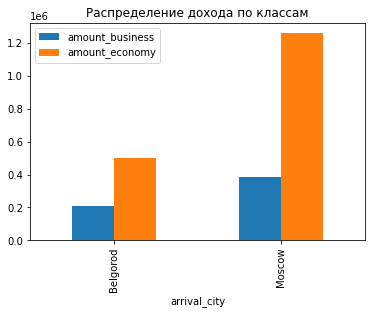

In [212]:
#4. распределение прибыли по бизнесу и эконому
travel.pivot_table(values = ['amount_economy','amount_business'], 
               index = 'arrival_city', 
               aggfunc = 'mean').plot(kind = 'bar', title = 'Распределение дохода по классам')

In [214]:
travel[travel['all_filling'] <= 0.75]

,flight_id,flight_no,departure_city,arrival_city,aircraft,fly_date,fly_date_dow,trevel_time_min,economy_seats,taked_economy,...,taked_business,amount_business,all_seats,all_taked,all_amount,fly_cost,profitability,economy_filling,business_filling,all_filling
2,136122,PG0252,Anapa,Moscow,Boeing 737-300,2017-01-08T10:05:00Z,Воскресенье,100.0,118,87,...,10,366000.0,130,97,1431000.0,179551,1251449.0,0.74,0.83,0.75
38,136360,PG0252,Anapa,Moscow,Boeing 737-300,2017-02-05T10:05:00Z,Воскресенье,100.0,118,86,...,11,402600.0,130,97,1455400.0,179551,1275849.0,0.73,0.92,0.75
68,136642,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-30T09:25:00Z,Понедельник,49.0,85,54,...,10,189000.0,97,64,531000.0,57525,473475.0,0.64,0.83,0.66
93,136807,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-23T09:25:00Z,Четверг,50.0,85,60,...,8,151200.0,97,68,531000.0,58699,472301.0,0.71,0.67,0.70


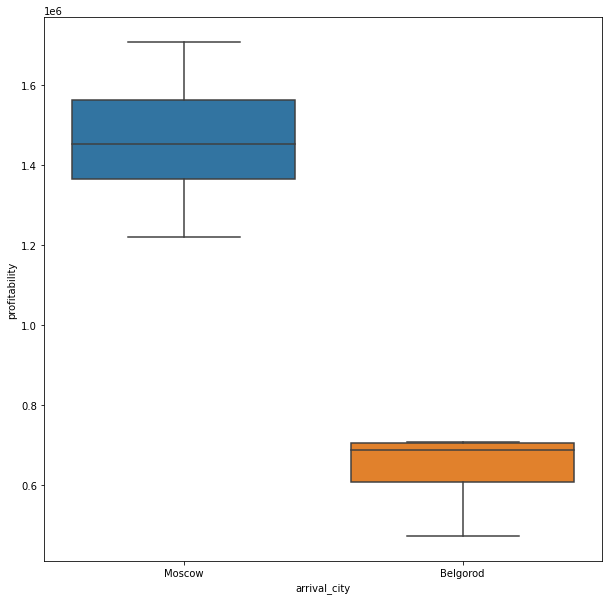

In [219]:
fig, axes = plt.subplots(figsize = (10, 10))
sns.boxplot(x = 'arrival_city' ,y = 'profitability',data = travel)

In [216]:
Moscow_min = travel[travel['arrival_city'] == 'Moscow'].profitability.quantile(q=0.1)
Belgorod_min = travel[travel['arrival_city'] == 'Belgorod'].profitability.quantile(q=0.1)

In [217]:
travel[(travel['arrival_city'] == 'Moscow') & (travel['profitability'] < Moscow_min)]

,flight_id,flight_no,departure_city,arrival_city,aircraft,fly_date,fly_date_dow,trevel_time_min,economy_seats,taked_economy,...,taked_business,amount_business,all_seats,all_taked,all_amount,fly_cost,profitability,economy_filling,business_filling,all_filling
2,136122,PG0252,Anapa,Moscow,Boeing 737-300,2017-01-08T10:05:00Z,Воскресенье,100.0,118,87,...,10,366000.0,130,97,1431000.0,179551,1251449.0,0.74,0.83,0.75
12,136178,PG0252,Anapa,Moscow,Boeing 737-300,2017-01-29T10:05:00Z,Воскресенье,99.0,118,90,...,9,329400.0,130,99,1434600.0,177756,1256844.0,0.76,0.75,0.76
16,136204,PG0252,Anapa,Moscow,Boeing 737-300,2017-02-23T10:05:00Z,Четверг,100.0,118,101,...,6,219600.0,130,107,1457800.0,179551,1278249.0,0.86,0.50,0.82
21,136250,PG0252,Anapa,Moscow,Boeing 737-300,2017-02-08T10:05:00Z,Среда,101.0,118,91,...,8,292800.0,130,99,1407800.0,181347,1226453.0,0.77,0.67,0.76
38,136360,PG0252,Anapa,Moscow,Boeing 737-300,2017-02-05T10:05:00Z,Воскресенье,100.0,118,86,...,11,402600.0,130,97,1455400.0,179551,1275849.0,0.73,0.92,0.75
54,136464,PG0252,Anapa,Moscow,Boeing 737-300,2017-01-09T10:05:00Z,Понедельник,100.0,118,93,...,7,256200.0,130,100,1398000.0,179551,1218449.0,0.79,0.58,0.77


In [222]:
travel[(travel['arrival_city'] == 'Moscow') & (travel['profitability'] < Moscow_min)].flight_id

2     136122
12    136178
16    136204
21    136250
38    136360
54    136464
Name: flight_id, dtype: int64

In [218]:
travel[(travel['arrival_city'] == 'Belgorod') & (travel['profitability'] < Belgorod_min)]

,flight_id,flight_no,departure_city,arrival_city,aircraft,fly_date,fly_date_dow,trevel_time_min,economy_seats,taked_economy,...,taked_business,amount_business,all_seats,all_taked,all_amount,fly_cost,profitability,economy_filling,business_filling,all_filling
65,136620,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-17T09:25:00Z,Пятница,49.0,85,70,...,9,170100.0,97,79,613500.0,57525,555975.0,0.82,0.75,0.81
68,136642,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-30T09:25:00Z,Понедельник,49.0,85,54,...,10,189000.0,97,64,531000.0,57525,473475.0,0.64,0.83,0.66
93,136807,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-23T09:25:00Z,Четверг,50.0,85,60,...,8,151200.0,97,68,531000.0,58699,472301.0,0.71,0.67,0.70
100,136844,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-28T09:25:00Z,Вторник,50.0,85,73,...,6,113400.0,97,79,575100.0,58699,516401.0,0.86,0.50,0.81
107,136887,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-20T09:25:00Z,Пятница,49.0,85,70,...,8,151200.0,97,78,595200.0,57525,537675.0,0.82,0.67,0.80
111,136922,PG0480,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-11T09:25:00Z,Суббота,50.0,85,66,...,10,189000.0,97,76,607800.0,58699,549101.0,0.78,0.83,0.78


In [224]:
travel[(travel['arrival_city'] == 'Belgorod') & (travel['profitability'] < Belgorod_min)].flight_id

65     136620
68     136642
93     136807
100    136844
107    136887
111    136922
Name: flight_id, dtype: int64